# Exercise 1 (20 points) 

Please state **True** or **False** for the below statements.

- (a) Tensors in TensorFlow can only hold numerical data types, such as integers or floats. 

- (b) A deep neural network with three hidden layers will always outperform a deep neural network with two hidden layers. 

- (c) CNNs are primarily used for image-related tasks but can also be applied to other domains like natural language processing (NLP) and time series data. 

- (d) The objective of the activation function in a neural network is to handle linearity in the network. 

- (e) `TensorFlow` can only run on `CPU`. 

- (f) `Dropout` is a technique that can help to prevent overfitting in neural networks. 

- (g) `TensorFlow` can only run on `GPU`. 

- (h) In a CNN, the convolutional layer is responsible for learning spatial hierarchies by applying filters that detect features such as edges, textures, and patterns. 

- (i) Pooling layers in CNNs increase the spatial dimensions of the input to gain more details about the data. 

- (j) In deep neural networks, increasing the number of hidden layers and `batch_size` will always improve model performance. 

a. False

b. False

c. True

d. False

e. False

f. True

g. False

h. True

i. False

j. False

# Exercise 2 (5 points)

How many neurons do you need in the output layer if you want to classify email into `spam` or `ham`? What activation function should you use in the output layer?

1, sigmoid

# Exercise 3 (4 points)

What is the main reason of increasing popularity of Deep Learning?

- (a) The advances in deep learning algorithms and research.
- (b) The availability of massive amounts of data for training deep learning algorithms.
- (c) The dramatic increases in computer processing capabilities.
- (d) All of the above.
- (e) None of the above.

d

# Exercise 4 (5 points)

What is the difference between `tf.Variable` and `tf.get_variable`?

tf.variable is used to creat a new create a new variable while tf.get_variable can be used to create or return a variable. 

# Exercise 5 (4 points)

`ReLU` is one of the most popular activation function in deep learning applications. Which of the following best describes the `ReLU` function?

- (a) (-1, 1)
- (b) (0, 5)
- (c) (0, max)
- (d) (-inf, inf)
- (e) (0, 1)

c

# Exercise 6 (4 points)

What is a dense layer in a `TensorFlow` model?

It is a layer of nurons where every nuron is connected to every nuron in the previous layer. 

# Exercise 7 (5 points)

What kind of features do the early layers of a CNN find? How about the later layers?

Early layers detect low level details like edges, textures, and corners. The later layers detect higher level details such as parts of objects, and complex shapes.

# Exercise 8 (4 points) 

Which of the following statements best describe the purpose of the Pooling layer in a CNN model?

- (a) To apply filters that detect spatial features like edges and textures.
- (b) To reduce the spatial dimensions of the input and help control overfitting.
- (c) To increase the number of neurons in the network for better learning capacity.
- (d) To normalize the input data and ensure a consistent distribution of values.
- (e) All of the above.
- (f) None of the above.

b

# Exercise 9 (5 points)

What is data augmentation in CNN? Why is needed?

Augmentations can be include geometric, color, noise addition, and cropping. This is needed reduce the chance of overfitting, increase dataset size, and improve generalization. 

# Exercise 10 (4 points)

In deep learning models, which of the following is the most appropriate choice for the output layer activation function in a regression task?

- (a) Softmax 
- (b) ReLu
- (c) Sigmoid
- (d) Tanh
- (e) All of the above
- (f) None

f

# Exercise 11

Consider the `train.csv` data file. These are the descriptions of most of the variables in this dataset:

- `clonesize`: the average blueberry clone size in the field.
- `honeybee`: honeybee density in the field.
- `bumbles`: bumblebee density in the field.
- `andrena`: andrena bee density in the field.
- `osmia`: osmia bee density in the field.
- `MaxOfUpperTRange`: the highest record of the upper band daily air temperature during the bloom season.
- `MinOfUpperTRange`: the lowest record of the upper band daily air temperature.
- `AverageOfUpperTRange`: the average of the upper band daily air temperature.
- `MaxOfLowerTRange`: the highest record of the lower band daily air temperature.
- `MinOfLowerTRange`: the lowest record of the lower band daily air temperature.
- `AverageOfLowerTRange`: the average of the lower band daily air temperature.
- `RainingDays`: the total number of days during the bloom season, each of which has precipitation larger than zero.
- `AverageRainingDays`: the average of raining days of the entire bloom season.

In this exercise, you will built a few deep learning networks to predict `yield`. 

### Exercise 11(a) (2 points)

Load the following libraries.

```
import pandas as pd 
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold

import tensorflow as tf
```

In [1]:
import pandas as pd 
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold

import tensorflow as tf

### Exercise 11(b) (2 points)

Read the `train.csv` data file and create a data frame called `df`. Make sure to use the `id` column as index. Hint: use `index_col='id'` in `pd.read_csv()`.


In [2]:
df = pd.read_csv('train.csv', index_col='id')
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


### Exercise 11(c) (3 points)

Create a histogram of `yield`. Describe the chart.

<Axes: >

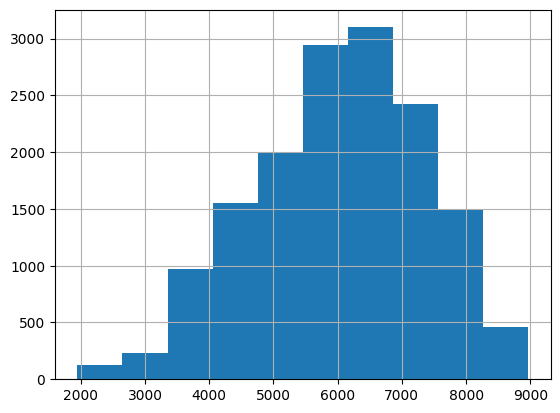

In [3]:
df['yield'].hist()

### Exercise 11(d) (4 points)

Define `yield` as the target feature, and the other features as the input features. Then, split the data into `train` (80%) and `test` (20%.)

In [10]:
x = df.drop(columns=['yield'], axis=1)
y = df['yield']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

### Exercise 11(e) (6 points)

Build a neural network and evaluate it as follows:

- Define a network with 2 layers of 32 neurons and `relu` as the activation function.
- Compile the model with `optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)`, and `loss='MeanAbsoluteError'`.
- Build the model on the `train` data, with `epochs=30` and `validation_split=0.1`.
- Evaluate the model in the `test` data.

In [12]:
md_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape = (16,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

md_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='MeanAbsoluteError')

md_1.fit(x_train, y_train, epochs=30, validation_split=.1)

MAE = md_1.evaluate(x_test, y_test)
print(f'MAE:{MAE}')

c:\Users\gmgma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1291.8309 - val_loss: 498.8000
Epoch 2/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 561.9757 - val_loss: 484.2316
Epoch 3/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 518.6812 - val_loss: 452.9629
Epoch 4/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 522.2932 - val_loss: 507.4602
Epoch 5/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 508.3509 - val_loss: 461.1484
Epoch 6/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 530.3554 - val_loss: 444.1175
Epoch 7/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 495.9526 - val_loss: 671.8853
Epoch 8/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 529.4428 - val_loss: 500.9597
Epoch 9/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 529.5688 - val_loss: 502.7916
Epoch 10/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 502.2255 - val_loss: 469.2305
Epoch 11/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 506.9015 - val_loss: 533.1132
Epoch 1

### Exercise 11(f) (6 points)

Build a neural network and evaluate it as follows:

- Define a network with 2 layers of 32 neurons and `relu` as the activation function. Make sure to include `BatchNormalization()`
before the first layer.
- Compile the model with `optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)`, and `loss='MeanAbsoluteError'`.
- Build the model on the `train` data, with `epochs=30` and `validation_split=0.1`.
- Evaluate the model in the `test` data.

In [13]:
md_2 = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, input_shape = (16,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

md_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='MeanAbsoluteError')

md_2.fit(x_train, y_train, epochs=30, validation_split=.1)

MAE = md_2.evaluate(x_test, y_test)
print(f'MAE:{MAE}')

Epoch 1/30


c:\Users\gmgma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1625.3939 - val_loss: 716.7899
Epoch 2/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 564.2627 - val_loss: 438.0513
Epoch 3/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 534.6022 - val_loss: 402.8105
Epoch 4/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 592.7882 - val_loss: 468.3162
Epoch 5/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 565.8142 - val_loss: 423.1418
Epoch 6/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 537.4406 - val_loss: 406.3476
Epoch 7/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 597.7081 - val_loss: 414.6617
Epoch 8/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 532.3225 - val_loss: 429.1973
Epoch 9/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 549.6802 - val_loss: 379.2713
Epoch 10/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 510.8567 - val_loss: 391.8203
Epoch 11/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 521.5026 - val_loss: 610.7589
Epoch 12/30
344/34

### Exercise 11(g) (6 points)

Build a neural network and evaluate it as follows:

- Define a network with 2 layers of 32 neurons and `relu` as the activation function.
- Compile the model with `optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)`, and `loss='MeanAbsoluteError'`.
- Build the model on the `train` data, with `epochs=30`, `batch_size=64`, and `validation_split=0.1`.
- Evaluate the model in the `test` data.

In [14]:
md_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape = (16,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

md_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='MeanAbsoluteError')

md_3.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=.1)

MAE = md_3.evaluate(x_test, y_test)
print(f'MAE:{MAE}')

Epoch 1/30


c:\Users\gmgma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1760.2091 - val_loss: 910.2842
Epoch 2/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 567.8337 - val_loss: 457.6087
Epoch 3/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 515.7010 - val_loss: 512.2730
Epoch 4/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 486.1462 - val_loss: 654.0971
Epoch 5/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 540.9712 - val_loss: 465.6857
Epoch 6/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 491.4198 - val_loss: 684.5114
Epoch 7/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 482.2625 - val_loss: 473.3403
Epoch 8/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 476.8086 - val_loss: 486.0017
Epoch 9/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 527.6116 - val_loss: 530.1783
Epoch 10/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 508.5108 - val_loss: 633.1710
Epoch 11/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 539.5466 - val_loss: 452.2710
Epoch 12/30
172/17

### Exercise 11(h) (6 points)

Build a neural network and evaluate it as follows:

- Define a network with 2 layers of 32 neurons and `relu` as the activation function. Make sure to include `BatchNormalization()`
before the first layer.
- Compile the model with `optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)`, and `loss='MeanAbsoluteError'`.
- Build the model on the `train` data, with `epochs=30`, `batch_size=64`, and `validation_split=0.1`.
- Evaluate the model in the `test` data.

In [15]:
md_4 = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, input_shape = (16,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

md_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='MeanAbsoluteError')

md_4.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=.1)

MAE = md_4.evaluate(x_test, y_test)
print(f'MAE:{MAE}')

Epoch 1/30


c:\Users\gmgma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1970.8140 - val_loss: 1084.6003
Epoch 2/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 513.9568 - val_loss: 719.1730
Epoch 3/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 529.4059 - val_loss: 452.5675
Epoch 4/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 481.1037 - val_loss: 438.9317
Epoch 5/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 466.1716 - val_loss: 723.2280
Epoch 6/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 477.1494 - val_loss: 373.6543
Epoch 7/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 532.0060 - val_loss: 609.5101
Epoch 8/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 486.2460 - val_loss: 415.5696
Epoch 9/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 485.2842 - val_loss: 390.3369
Epoch 10/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 522.4205 - val_loss: 388.1635
Epoch 11/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 448.4536 - val_loss: 373.2363
Epoch 12/30
172/1

### Exercise 11(i) (2 points)

Using the results from parts 1(e) to 1(h), what model would use to predict `yield`?

I would use model 2 because it has the lowest MAE

# Exercise 12

In this exercise, we will practice how to use deep neural networks on image data. We will be using the popular [Fashion mnist](https://www.tensorflow.org/datasets/catalog/fashion_mnist), which consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image associated with a label from 10 classes. Our goal is to build a neural network model to predict the label of a given image. We will achieve this in the following exercises.

### Exercise 12(a) (2 points)

Load the below libraries.

```
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
```

In [16]:
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

### Exercise 12(b) (2 points)

Load the `fashion_mnist` data as follows:

```
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
```

In [22]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Exercise 12(c) (12 points)

Build a CNN model as follows:

- Change the digit labels to 0-1 encoding.
- The CNN model should have the following layers in the given order:
    - `Conv2D` with 32 filters, `kernel_size=(3,3)` and `activation=relu`
    - `MaxPooling2D` with `pool_size=(2,2)`
    - `Conv2D` with 32 filters, `kernel_size=(3,3)` and `activation=relu`
    - `MaxPooling2D` with `pool_size=(2,2)`
    - `Flatten`
    - `Dense` with 128 neurons and `activation=relu`
    - `Dense` with 10 neurons and `activation=softmax`
- Compile the network with the following:
    - `optimizer='adam'`
    - `loss='categorical_crossentropy'`
    - `metrics=['accuracy']`
- Train the deep neural network with `epochs=50`, `batch_size=128`, and `validation_split=0.1`.
- Evaluate the model on the `test` data set.

In [23]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

md1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

md1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

md1.fit(X_train, y_train, epochs = 50, batch_size = 128, validation_split = 0.1)

test_loss, test_acc = md1.evaluate(X_test, y_test, verbose = 0)
print(test_acc)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7024 - loss: 2.0391 - val_accuracy: 0.8448 - val_loss: 0.4251
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8626 - loss: 0.3883 - val_accuracy: 0.8702 - val_loss: 0.3527
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8844 - loss: 0.3173 - val_accuracy: 0.8743 - val_loss: 0.3316
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8970 - loss: 0.2820 - val_accuracy: 0.8832 - val_loss: 0.3220
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9071 - loss: 0.2468 - val_accuracy: 0.8895 - val_loss: 0.3069
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9179 - loss: 0.2220 - val_accuracy: 0.8802 - val_loss: 0.3324
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9241 - loss: 0.2030 - val_accuracy: 0.8930 - val_loss: 0.3131
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9284 - loss: 0.1904 - val_accu

### Exercise 12(d) (10 points)

Build a CNN model as follows:

- The CNN model should have the following layers in the given order:
    - `Conv2D` with 32 filters, `kernel_size=(3,3)` and `activation=relu`
    - `MaxPooling2D` with `pool_size=(2,2)`
    - `Conv2D` with 64 filters, `kernel_size=(3,3)` and `activation=relu`
    - `MaxPooling2D` with `pool_size=(2,2)`
    - `Flatten`
    - `Dense` with 128 neurons and `activation=relu`
    - `Dense` with 10 neurons and `activation=softmax`
- Compile the network with the following:
    - `optimizer='adam'`
    - `loss='categorical_crossentropy'`
    - `metrics=['accuracy']`
- Train the deep neural network with `epochs=50`, `batch_size=128`, and `validation_split=0.1`.
- Evaluate the model on the `test` data set.

Notice that there is no need to 0-1 encode the target labels (it was done in part 11(c)); you can go ahead and train the model.

In [24]:
md2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

md2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

md2.fit(X_train, y_train, epochs = 50, batch_size = 128, validation_split = 0.1)

test_loss, test_acc = md2.evaluate(X_test, y_test, verbose = 0)
print(test_acc)

Epoch 1/50


c:\Users\gmgma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7053 - loss: 3.1526 - val_accuracy: 0.8510 - val_loss: 0.4084
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8664 - loss: 0.3673 - val_accuracy: 0.8697 - val_loss: 0.3578
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8901 - loss: 0.3057 - val_accuracy: 0.8838 - val_loss: 0.3231
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9023 - loss: 0.2643 - val_accuracy: 0.8898 - val_loss: 0.3117
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9104 - loss: 0.2388 - val_accuracy: 0.8915 - val_loss: 0.3004
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9215 - loss: 0.2136 - val_accuracy: 0.8927 - val_loss: 0.3164
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9278 - loss: 0.2001 - val_accuracy: 0.8977 - val_loss: 0.2947
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9306 - loss: 0.1806 - val_accuracy: 0.888

### Exercise 12(e) (10 points)

Build a CNN model as follows:

- The CNN model should have the following layers in the given order:
    - `Conv2D` with 64 filters, `kernel_size=(3,3)` and `activation=relu`
    - `MaxPooling2D` with `pool_size=(2,2)`
    - `Conv2D` with 64 filters, `kernel_size=(3,3)` and `activation=relu`
    - `MaxPooling2D` with `pool_size=(2,2)`
    - `Flatten`
    - `Dense` with 128 neurons and `activation=relu`
    - `Dense` with 10 neurons and `activation=softmax`
- Compile the network with the following:
    - `optimizer='adam'`
    - `loss='categorical_crossentropy'`
    - `metrics=['accuracy']`
- Train the deep neural network with `epochs=50`, `batch_size=128`, and `validation_split=0.1`.
- Evaluate the model on the `test` data set.

Notice that there is no need to 0-1 encode the target labels (it was done in part 11(c)); you can go ahead and train the model.


In [25]:
md3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

md3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

md3.fit(X_train, y_train, epochs = 50, batch_size = 128, validation_split = 0.1)

test_loss, test_acc = md3.evaluate(X_test, y_test, verbose = 0)
print(test_acc)

Epoch 1/50


c:\Users\gmgma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7026 - loss: 3.3537 - val_accuracy: 0.8450 - val_loss: 0.4142
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8656 - loss: 0.3727 - val_accuracy: 0.8715 - val_loss: 0.3542
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8848 - loss: 0.3091 - val_accuracy: 0.8778 - val_loss: 0.3519
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8967 - loss: 0.2784 - val_accuracy: 0.8897 - val_loss: 0.3127
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9075 - loss: 0.2476 - val_accuracy: 0.8877 - val_loss: 0.2989
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9151 - loss: 0.2289 - val_accuracy: 0.8937 - val_loss: 0.3042
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9187 - loss: 0.2128 - val_accuracy: 0.8873 - val_loss: 0.3032
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9271 - loss: 0.1942 - val_accurac

### Exercise 12(f) (15 points)

Using the best model from parts 1(c) to 1(e), and `ImageDataGenerator` from `TensorFlow` augment the `fahion_mnist` data. Consider the below configuration to augment the `fashion_mnist` data set.

```
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,   # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # Randomly shift images vertically (fraction of total height)
    zoom_range=0.1,           # Randomly zoom images by up to 10%
    horizontal_flip=False,   # Not flipping 
)
```

Reload the `fashion_mnist` data set, re-train the best model from parts 1(c) to 1(e) and augment the data with `datagen`. Report the accuracy on the `test` data set.

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define the data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,   # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # Randomly shift images vertically (fraction of total height)
    zoom_range=0.1,           # Randomly zoom images by up to 10%
    horizontal_flip=False,   # Not flipping 
)


md4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

md4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

md4.fit(datagen.flow(X_train, y_train, batch_size=128), epochs=50, validation_data=(X_test, y_test))

test_loss, test_acc = md4.evaluate(X_test, y_test, verbose = 0)
print(test_acc)

Epoch 1/50


c:\Users\gmgma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\gmgma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.6207 - loss: 2.1947 - val_accuracy: 0.8039 - val_loss: 0.5517
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.7917 - loss: 0.5481 - val_accuracy: 0.8364 - val_loss: 0.4447
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.8130 - loss: 0.4944 - val_accuracy: 0.8265 - val_loss: 0.4904
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.8238 - loss: 0.4676 - val_accuracy: 0.8443 - val_loss: 0.4252
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.8312 - loss: 0.4390 - val_accuracy: 0.8596 - val_loss: 0.3867
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.8395 - loss: 0.4249 - val_accuracy: 0.8495 - val_loss: 0.4298
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.8416 - loss: 0.4154 - val_accuracy: 0.8567 - val_loss: 0.3928
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.8538 - loss: 0.3909 - val_accurac

### Exercise 12(g) (2 points)

Did the augmentation boost the model performance? Please, be specific.

My best model prior to augmentaion was model 2 with .898 accuracy. Model 4 with augmentation had an accuracy of .894 so augmentation did not improve the performace of the model.